In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

#read in the data using pandas
df = pd.read_csv("HTRU_2.csv")
#check data has been read in properly
df.head()


,Mean,Std_Dev,Kurtosis,Skewness,Mean_DM,Dev_DM,Kurtosis_DM,Skew_DM,Pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [2]:
#check number of rows and columns in dataset
df.shape


(17898, 9)

In [3]:
#create a dataframe with all training data except the target column
X = df.drop(columns=["Pulsar"])
#Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)
print(X)

[[140.5625      55.68378214  -0.23457141 ...  19.11042633   7.97553179
   74.24222492]
 [102.5078125   58.88243001   0.46531815 ...  14.86014572  10.57648674
  127.3935796 ]
 [103.015625    39.34164944   0.32332837 ...  21.74466875   7.73582202
   63.17190911]
 ...
 [119.3359375   59.93593941   0.1593631  ...  58.8720002    2.49951714
    4.59517265]
 [114.5078125   53.90239966   0.20116138 ...  13.38173065  10.00796731
  134.2389095 ]
 [ 57.0625      85.79734025   1.40639105 ...  64.71256228  -1.59752658
    1.42947536]]


In [4]:
#separate target values
y = df['Pulsar'].values
#view first 5 target values
y[0:5]


array([0, 0, 0, 0, 0], dtype=int64)

# Analyzing the data with Seaborn

Text(0.5, 1.0, 'Correlations')

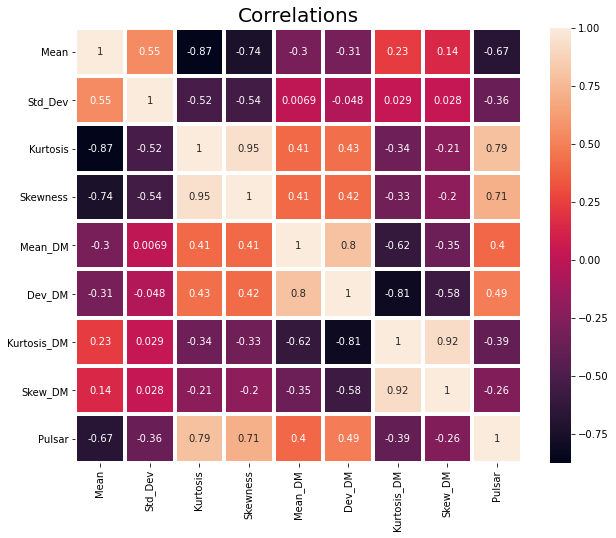

In [5]:
# Applying heatmap to see correlations in the independent variables
heat = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(heat, annot=True, linewidth=3)
plt.title("Correlations", fontsize=20)


In [6]:
# Plot out the best correlation from heatmap

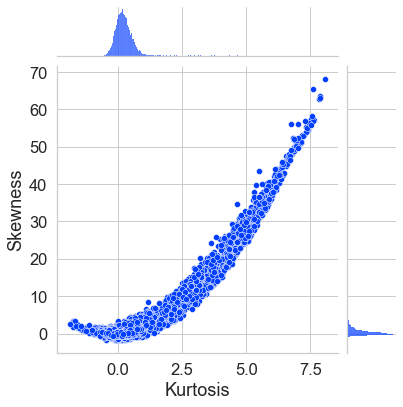

In [7]:
sns.set(font_scale=1.5)
sns.set_palette("bright")
sns.set_style('whitegrid')
sns.jointplot(x = 'Kurtosis', y = 'Skewness', data = df)


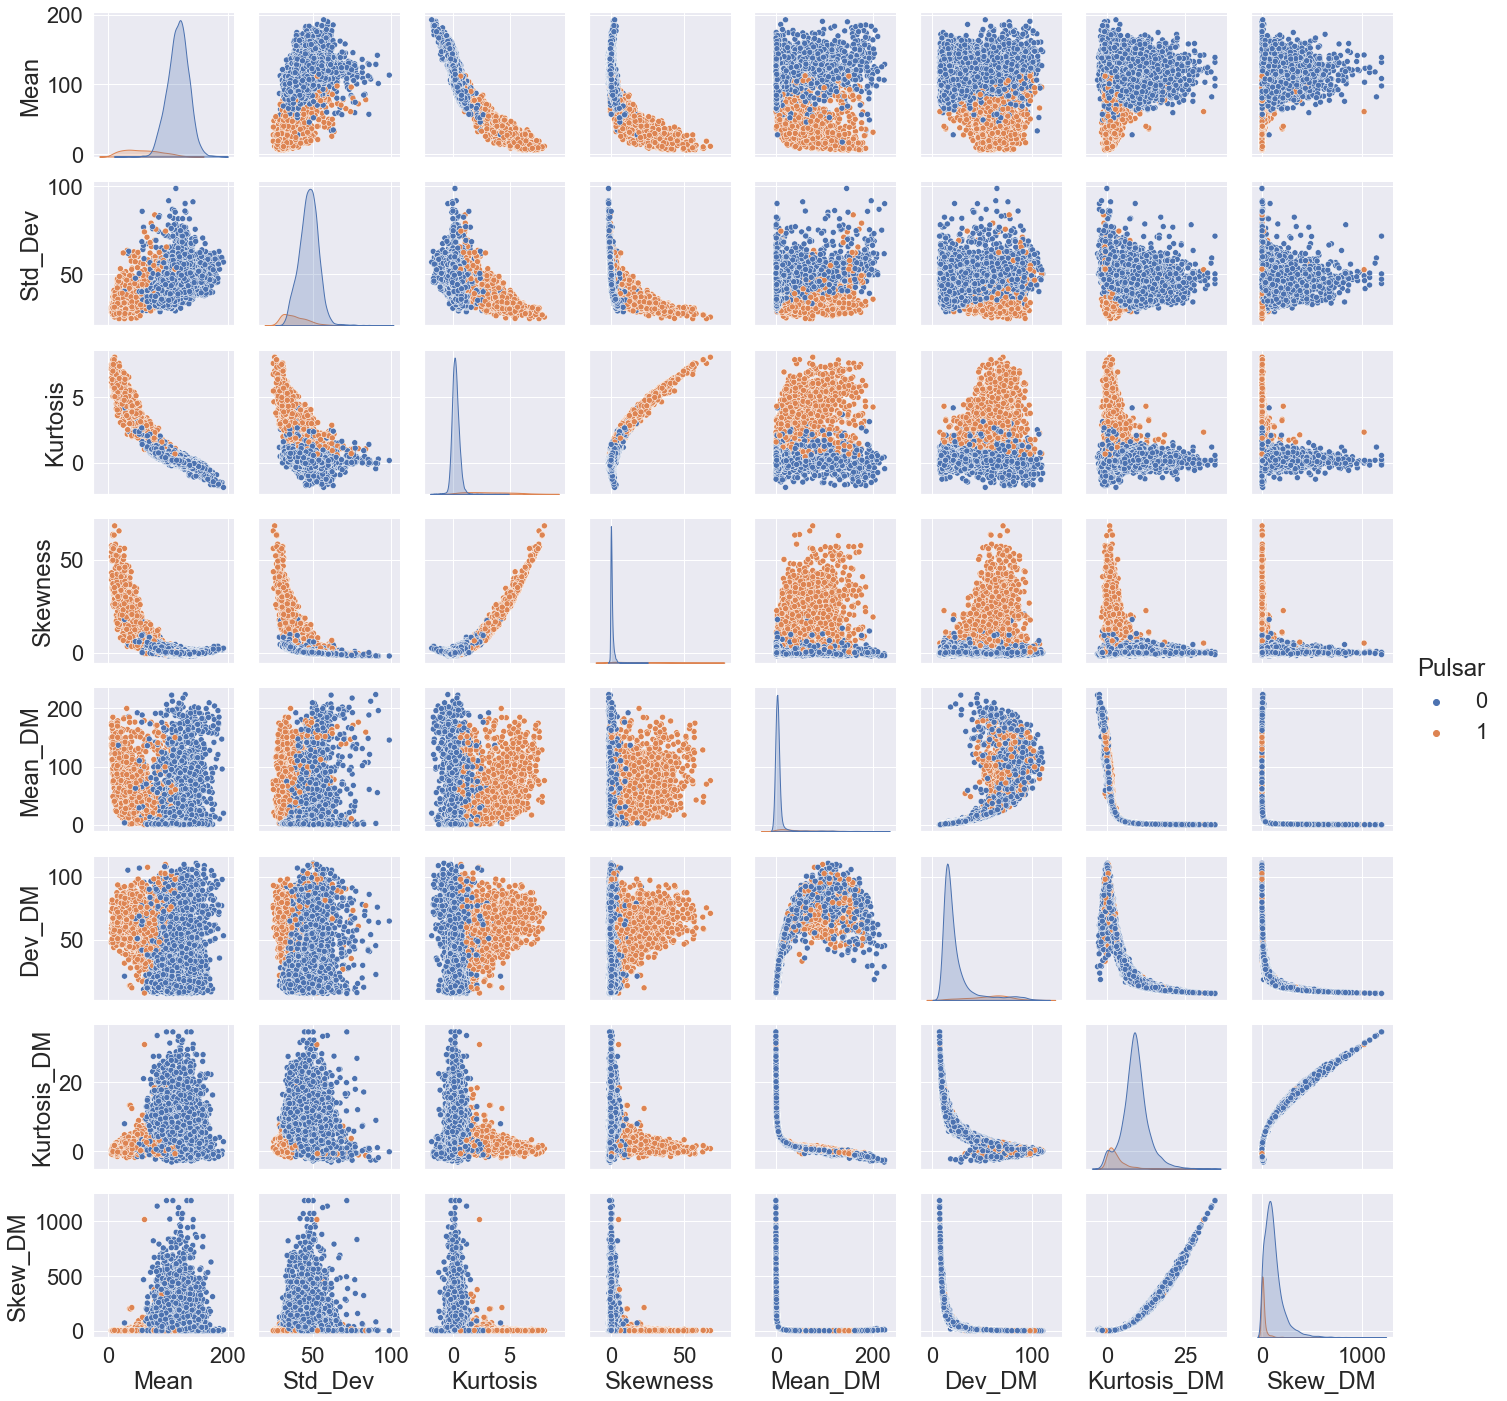

In [8]:
# Assigning a hue variable to add a semantic mapping and plot a layered kernel density estimate (KDE):
sns.set(font_scale=2)
sns.pairplot(df, hue="Pulsar")

Plot simple regression visualization with three variables

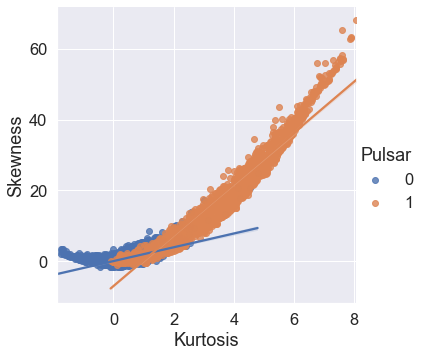

In [9]:
sns.set(font_scale=1.5)
g = sns.lmplot(x="Kurtosis", y="Skewness", hue="Pulsar", data=df)

# Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


# Feature scaling and transforming X_train and x_test

In [11]:
from sklearn.preprocessing import PowerTransformer
sc = PowerTransformer()
X_train[:, 0:] = sc.fit_transform(X_train[:, 0:])
X_test[:, 0:] = sc.transform(X_test[:, 0:])

In [12]:
print(X_train)

[[ 6.78464232e-01  2.67117217e-01 -1.06700536e-01 ... -4.71490088e-01
   2.14909061e-01  2.75541791e-01]
 [ 1.27538025e-01 -7.15884894e-01 -2.44515883e-01 ... -5.77642290e-01
   1.13108525e+00  9.88779059e-01]
 [-8.15545176e-01 -4.67087549e-01  1.96771515e-01 ...  3.06555478e-01
   8.23763659e-02  6.57399919e-04]
 ...
 [ 2.68110054e+00 -4.67286063e-01 -1.81666133e+00 ... -3.52953530e-01
   5.54689716e-01  4.58741031e-01]
 [ 1.00424368e+00  7.59426588e-01 -4.76111697e-01 ... -3.66623406e-02
   3.21133566e-01  2.75639570e-01]
 [-1.48036131e+00  5.83290048e-01  1.82595468e+00 ...  1.38583458e+00
  -1.71270857e+00 -1.61017153e+00]]


# Using K-NN 

Stratify means the proportions of the dependent variable results will remain the same for the random split. 

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier - 
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [14]:
#Confusion matrix from the 20 per cent of total data in the test set

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3234   18]
 [  48  280]]


0.9815642458100559

Now our model is trained. 

In [16]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]
print(X_test)


[[ 0.06534893  1.05742866 -0.22195647 ...  1.77871974 -1.99931407
  -2.21731906]
 [ 0.00358873 -0.11354023 -0.19423153 ... -1.06830655  1.15838088
   1.13125634]
 [-1.31671562 -0.6588262   1.27830788 ...  1.2907565  -0.92386452
  -0.98145404]
 ...
 [ 0.80332389  0.38302498 -0.71826465 ... -0.86736135  0.25616376
   0.45311773]
 [-0.55431236 -0.72237635  0.59759386 ... -1.32183238  1.22790433
   1.2449138 ]
 [ 0.04380801  0.82980316 -0.2786676  ...  1.28501717 -1.03045005
  -1.10802638]]


In [17]:
#Using score function to to see how well our model predictions match up to the actual results.
knn.score(X_test, y_test)


0.9815642458100559

# Hyperparameter tuning

# k-Fold Cross-Validation

In [18]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 10 
cv_scores = cross_val_score(knn_cv, X, y, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


[0.97039106 0.96815642 0.96536313 0.97374302 0.97374302 0.97039106
 0.96815642 0.9698324  0.97708217 0.96813862]
cv_scores mean:0.9704997330052368


# GridSearchCV

For our model, we will specify a range of values for “n_neighbors” 
in order to see which value works best for our model. To do this, we will create a dictionary, 
setting “n_neighbors” as the key and use numpy to create an array of values from 1 to 24.

In [19]:
from sklearn.model_selection import GridSearchCV
#create a new knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10)
#fit model to data
knn_gscv.fit(X, y)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [20]:
#check top performing n_neighbors value
knn_gscv.best_params_


{'n_neighbors': 17}

# Top performing n_neighbors value scores

In [21]:
knn_cv2 = KNeighborsClassifier(n_neighbors=17)
#train model with cv of 10 
cv_scores = cross_val_score(knn_cv2, X, y, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.96927374 0.97039106 0.96480447 0.97932961 0.97597765 0.97877095
 0.97318436 0.97374302 0.97820011 0.96925657]
cv_scores mean:0.9732931540044529


In [22]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_


0.9732931540044529